# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results ,how='outer',on="Mouse ID")

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
mouse_metadata.info

<bound method DataFrame.info of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
study_results.info

<bound method DataFrame.info of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [9]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [24]:
combined_df['Mouse ID']

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [25]:
combined_df["Mouse ID"].value_counts()

g989    13
q633    10
q597    10
s185    10
y769    10
        ..
t573     1
o848     1
u153     1
v199     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [26]:
# Checking the number of mice.
mice_id=combined_df['Mouse ID'].unique()
number_of_mice=len(mice_id)
print(number_of_mice)

249


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice in the clean DataFrame.
clean_mice_id=clean_df['Mouse ID'].unique()
cleaned_number_of_mice=len(clean_mice_id)
print(cleaned_number_of_mice)

248


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_df=clean_df.iloc[:,[1, 6]]
drug_group_df=tumor_vol_df.groupby(["Drug Regimen"])

drug_group_mean_df=drug_group_df.mean()
drug_group_median_df=drug_group_df.median()
drug_group_var_df=drug_group_df.var()
drug_group_std_df=drug_group_df.std()
drug_group_sem_df=drug_group_df.sem()


mean_df=drug_group_mean_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"Mean"})
median_df=drug_group_median_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"Median"})
var_df=drug_group_var_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"Variance"})
std_df=drug_group_std_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"STD"})
sem_df=drug_group_sem_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"SEM"})


drug_summary_df=pd.merge(mean_df,median_df, on="Drug Regimen")
drug_summary_df=drug_summary_df.merge(var_df, on="Drug Regimen")
drug_summary_df=drug_summary_df.merge(std_df, on="Drug Regimen")
drug_summary_df=drug_summary_df.merge(sem_df, on="Drug Regimen")
drug_summary_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_df.agg(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

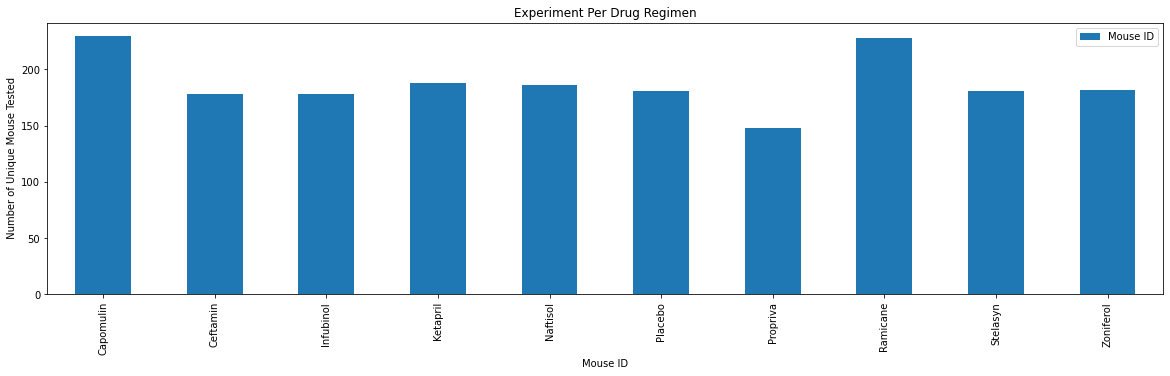

<Figure size 432x288 with 0 Axes>

In [41]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_test=pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count().reset_index())
drug_test_df=drug_test[["Drug Regimen","Mouse ID"]]
drug_test_df=drug_test_df.set_index("Drug Regimen")
drug_test_df.plot(kind = "bar", figsize = (20,5))
plt.title("Experiment Per Drug Regimen")
plt.xlabel("Mouse ID")
plt.ylabel(" Number of Unique Mouse Tested")
plt.show()
#plt.savefig('Data/bar_plot_pandas.png')

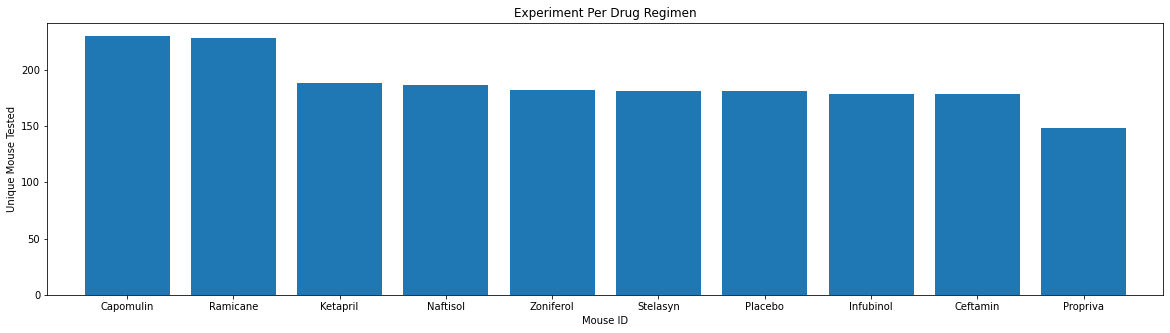

<Figure size 432x288 with 0 Axes>

In [45]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
plt.figure(figsize=(20,5))
plt.bar(clean_df["Drug Regimen"].value_counts().index,clean_df["Drug Regimen"].value_counts(),align="center")

plt.xlim(-0.75, len(clean_df["Drug Regimen"].value_counts().index)-0.25)
plt.title("Experiment Per Drug Regimen")
plt.xlabel("Mouse ID")
plt.ylabel("Unique Mouse Tested")
plt.show()
#plt.savefig('Data/bar_plot_pandas2.png')

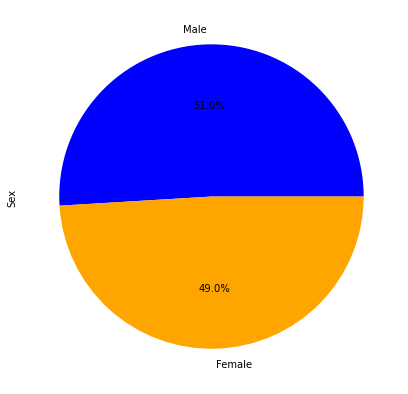

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(15,7))
clean_df['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=["blue","orange"]) 
plt.show()
#plt.savefig('Data/pie_pandas_plot1.png') 

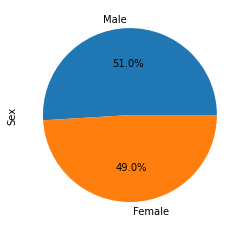

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df=clean_df['Sex'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(sex_df, labels=sex_df.index, autopct="%1.1f%%", colors=["blue","orange"]);
plt.title('Sex',loc='left')
plt.ylabel('Sex')

#plt.savefig('images/pie_matplot.png') 
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_merged_df = pd.merge(clean_df, max_timepoint_df, on='Mouse ID')
max_tp_merged_df.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Max Timepoint  
0              45.000000                 0             45

In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_vols = []

for drug in treatment_list:
    # Dataframe of matching drugs in Drug Regimen via loc
    drug_df = max_tp_merged_df.loc[max_tp_merged_df['Drug Regimen'] == drug]
    # Dataframe adding max timepoint lines via loc
    max_tp_drug_df = drug_df.loc[max_tp_merged_df['Timepoint'] == max_tp_merged_df['Max Timepoint']]
    # Series of Tumor values from dataframe
    values = max_tp_drug_df['Tumor Volume (mm3)']
    
     # add subset 
    treatment_vols.append(values)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerquart = quartiles[.25]
    upperquart = quartiles[.75]
    iqr = upperquart-lowerquart
    print(f'IQR for the tumor volume for {drug}: {iqr}')
    
    # Determine upper and lower bounds
    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
          
    # Determine outliers
    outlier_count = (values.loc[(max_tp_drug_df['Tumor Volume (mm3)'] >= upper_bound) | 
                  
                                (max_tp_drug_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'The number of {drug} outliers: {outlier_count}\n')
    

IQR for the tumor volume for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
The number of Capomulin outliers: 0

IQR for the tumor volume for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
The number of Ramicane outliers: 0

IQR for the tumor volume for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
The number of Infubinol outliers: 1

IQR for the tumor volume for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
The number of Ceftamin outliers: 0



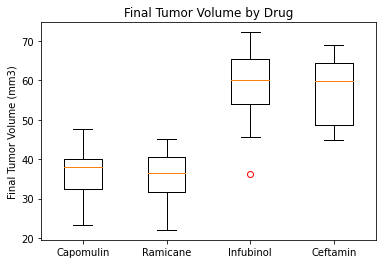

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(treatment_vols, flierprops=dict(markeredgecolor='red'))
# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()
#plt.savefig('Data/boxplot_matplot.png') 

## Line and Scatter Plots

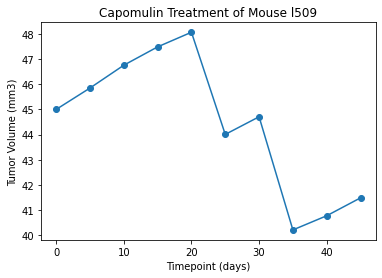

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_tp = clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse_tp['Timepoint'], mouse_tp['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show
#plt.savefig('Data/Lineplot_matplot.png') 

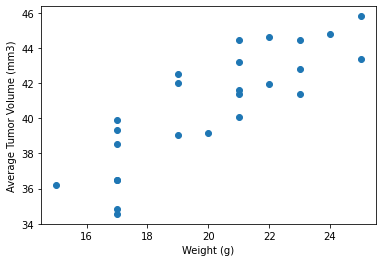

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

avg_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Vol'})

avg_volume_df = pd.merge(capomulin_df, avg_volume_df, on='Mouse ID')
unique_df = avg_volume_df[['Weight (g)', 'Avg Tumor Vol']].drop_duplicates()

x_axis = unique_df['Weight (g)']
y_axis = unique_df['Avg Tumor Vol']
plt.scatter(x_axis, y_axis)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show
#plt.savefig('Data/scatterplot_matplot.png') 

## Correlation and Regression

 The correlation between average mouse weight and the average tumor volume is 0.84


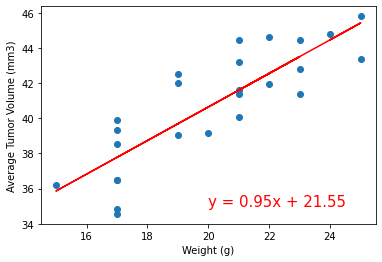

<Figure size 432x288 with 0 Axes>

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
r = st.pearsonr(x_axis, y_axis)
print(f" The correlation between average mouse weight and the average tumor volume is {round(r[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
#plt.savefig('Data/linear_regression_model_matplot.png') 